In [188]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_text, _tree
from sklearn.metrics import classification_report

import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
from sklearn import metrics
from joblib import dump, load

In [189]:
# Import the two datasets 
df = pd.read_csv("Log_labeled_train_trans.csv", header = 0).fillna(0)

In [190]:
data_top = df.columns
columns = list(data_top) 
print(columns)

['Start time', 'End time', 'Frontdoor', 'Hall-Bedroom_door', 'Hall-Bathroom_door', 'ToiletFlush', 'Hall-Toilet_door', 'Plates_cupboard', 'Groceries_Cupboard', 'Fridge', 'Freezer', 'Cups_cupboard', 'Dishwasher', 'Microwave', 'Washingmachine', 'Pans_Cupboard', 'Label']


In [191]:
features = columns
features.remove("Label")
features.remove("Start time")
features.remove("End time")
features

['Frontdoor',
 'Hall-Bedroom_door',
 'Hall-Bathroom_door',
 'ToiletFlush',
 'Hall-Toilet_door',
 'Plates_cupboard',
 'Groceries_Cupboard',
 'Fridge',
 'Freezer',
 'Cups_cupboard',
 'Dishwasher',
 'Microwave',
 'Washingmachine',
 'Pans_Cupboard']

In [192]:
X = df[features]
# y = df.Label_ID
y = df.Label

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7769784172661871


In [194]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

        get_drink       1.00      0.44      0.62         9
        go_to_bed       0.33      0.50      0.40         4
      leave_house       0.64      0.80      0.71        20
prepare_breakfast       0.67      0.36      0.47        11
   prepare_dinner       0.59      0.59      0.59        22
       use_toilet       0.91      0.95      0.93        73

         accuracy                           0.78       139
        macro avg       0.69      0.61      0.62       139
     weighted avg       0.79      0.78      0.77       139



In [195]:
print("Trying to predict the take shower activity, with ID 5, \nwith the following combination 1,0,0,0,0,0,0,3,0,0,0,0,0,0")
pred = clf.predict([[1,0,0,0,0,0,0,3,0,0,0,0,0,0]])
print("Value predicted:", pred)
if(pred == 5): print("Correct prediction") 
else: print("Wrong predicition")

Trying to predict the take shower activity, with ID 5, 
with the following combination 1,0,0,0,0,0,0,3,0,0,0,0,0,0
Value predicted: ['leave_house']
Wrong predicition


<AxesSubplot: xlabel='index', ylabel='Label'>

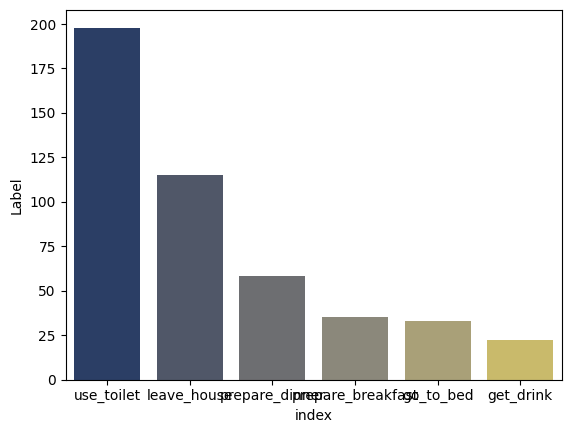

In [196]:
xx = df[["Label"][0]].value_counts().reset_index()
sns.barplot(x="index", y="Label", data= xx, palette="cividis")

               index  Label
0          go_to_bed    198
1         use_toilet    198
2  prepare_breakfast    198
3        leave_house    198
4     prepare_dinner    198
5          get_drink    198


<AxesSubplot: xlabel='index', ylabel='Label'>

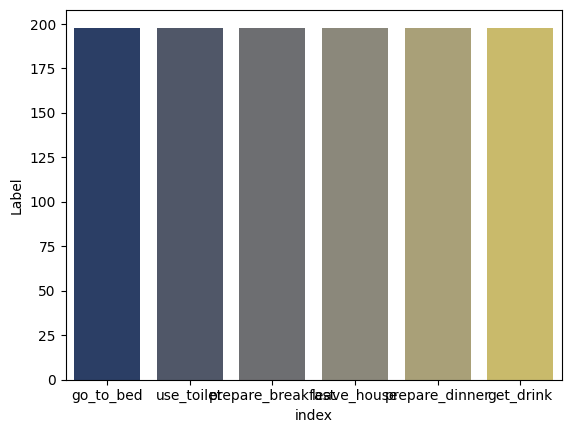

In [197]:
X = df[features]
y = df.Label

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df.columns = features + ["Label"]
xx = df[["Label"][0]].value_counts().reset_index()
print(xx)
sns.barplot(x="index", y="Label", data= xx, palette="cividis")

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

dump(clf, 'test.joblib') 

data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names = clf.classes_, filled=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('Log_Dtree.png')

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.834733893557423


In [199]:
df.iloc[56]

Frontdoor                   0.0
Hall-Bedroom_door           0.0
Hall-Bathroom_door          0.0
ToiletFlush                 0.0
Hall-Toilet_door            1.0
Plates_cupboard             0.0
Groceries_Cupboard          0.0
Fridge                      0.0
Freezer                     0.0
Cups_cupboard               0.0
Dishwasher                  0.0
Microwave                   0.0
Washingmachine              0.0
Pans_Cupboard               0.0
Label                 go_to_bed
Name: 56, dtype: object

In [200]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

        get_drink       0.80      1.00      0.89        60
        go_to_bed       0.94      0.83      0.88        60
      leave_house       0.95      0.68      0.80        60
prepare_breakfast       0.88      0.77      0.82        66
   prepare_dinner       0.79      0.75      0.77        51
       use_toilet       0.72      0.97      0.83        60

         accuracy                           0.83       357
        macro avg       0.85      0.83      0.83       357
     weighted avg       0.85      0.83      0.83       357

